<a href="https://colab.research.google.com/github/niteshkumar0205/machine-learning-/blob/main/day_7__Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing the dataset

data = pd.read_csv("https://raw.githubusercontent.com/SairamTadepalli19/Day7_ML/main/loan_prediction.csv")

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data.shape

(614, 13)

In [6]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
#Null variables

data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

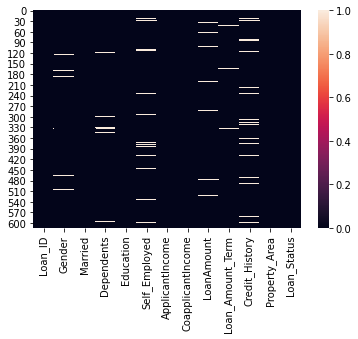

In [10]:
#Let's create heatmap using the null variables

sns.heatmap(data.isnull())

In [11]:
#Loan ID - drop

data.drop('Loan_ID', axis = 1, inplace = True)

In [12]:
#Check the unique features in gender

data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [13]:
#Check the count value of gender

data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


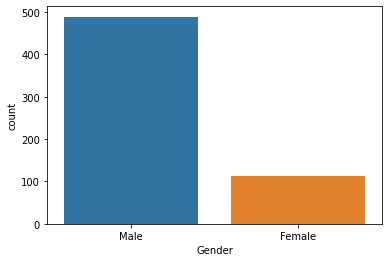

In [14]:
sns.countplot(data['Gender'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


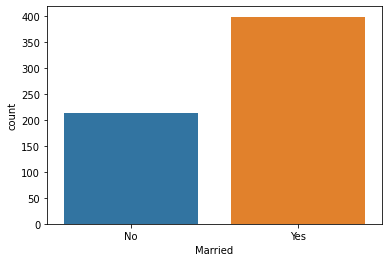

In [15]:
#Create countplot for Married

sns.countplot(data['Married'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


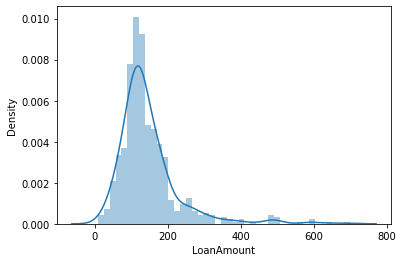

In [16]:
#Distplot for loan amount

sns.distplot(data['LoanAmount'])

In [17]:
#Check the null variables

data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
#We are filling or replacing the missing variables with the random values

data.fillna({"Gender": "Male",
             "Married": "Yes",
             "Dependents" : '0',
             "Self_Employed" : "No",
             "LoanAmount" : data['LoanAmount'].mean(),
             "Loan_Amount_Term" : data['Loan_Amount_Term'].mean(),
             "Credit_History": 1 }, inplace = True)

In [19]:
#Check for the null values

data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [20]:
#Mapping teh Loan Status into numerical format

data['Loan_Status'] = data['Loan_Status'].map({'Y' : 1, 'N': 0})

In [21]:
data['Loan_Status']

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [22]:
#Dummy Variables

cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
df = pd.get_dummies(data[cat_cols], drop_first= True)

In [23]:
df

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,0,0,0,1
1,1,1,1,0,0,0,0,0,0
2,1,1,0,0,0,0,1,0,1
3,1,1,0,0,0,1,0,0,1
4,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,0,0,0
610,1,1,0,0,1,0,0,0,0
611,1,1,1,0,0,0,0,0,1
612,1,1,0,1,0,0,0,0,1


In [24]:
data.drop(cat_cols, axis = 1, inplace = True)

In [25]:
data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,5849,0.0,146.412162,360.0,1.0,1
1,4583,1508.0,128.000000,360.0,1.0,0
2,3000,0.0,66.000000,360.0,1.0,1
3,2583,2358.0,120.000000,360.0,1.0,1
4,6000,0.0,141.000000,360.0,1.0,1
...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,1
610,4106,0.0,40.000000,180.0,1.0,1
611,8072,240.0,253.000000,360.0,1.0,1
612,7583,0.0,187.000000,360.0,1.0,1


In [26]:
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [27]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()

data[num_cols] = scale.fit_transform(data[num_cols])

In [28]:
data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0.070489,0.000000,0.198860,0.74359,1.0,1
1,0.054830,0.036192,0.172214,0.74359,1.0,0
2,0.035250,0.000000,0.082489,0.74359,1.0,1
3,0.030093,0.056592,0.160637,0.74359,1.0,1
4,0.072356,0.000000,0.191027,0.74359,1.0,1


In [29]:
#Creating new dataset - df(DUmmy variables, data)

new_data = pd.concat([df, data], axis = 1)

In [30]:
new_data.head()

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1,0,0,0,0,0,0,0,1,0.070489,0.000000,0.198860,0.74359,1.0,1
1,1,1,1,0,0,0,0,0,0,0.054830,0.036192,0.172214,0.74359,1.0,0
2,1,1,0,0,0,0,1,0,1,0.035250,0.000000,0.082489,0.74359,1.0,1
3,1,1,0,0,0,1,0,0,1,0.030093,0.056592,0.160637,0.74359,1.0,1
4,1,0,0,0,0,0,0,0,1,0.072356,0.000000,0.191027,0.74359,1.0,1


In [31]:
x = new_data.drop('Loan_Status', axis = 1)

y = new_data['Loan_Status']

In [32]:
x.head()

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,0,0,0,1,0.070489,0.000000,0.198860,0.74359,1.0
1,1,1,1,0,0,0,0,0,0,0.054830,0.036192,0.172214,0.74359,1.0
2,1,1,0,0,0,0,1,0,1,0.035250,0.000000,0.082489,0.74359,1.0
3,1,1,0,0,0,1,0,0,1,0.030093,0.056592,0.160637,0.74359,1.0
4,1,0,0,0,0,0,0,0,1,0.072356,0.000000,0.191027,0.74359,1.0


In [33]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [34]:
#Splitting the training and test sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [35]:
#Shape of x_train, y_train

print(x_train.shape, y_train.shape)

(491, 14) (491,)


In [36]:
#Logistic Regression Implementation

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score, precision_score, recall_score

y_pred =  model.predict(x_train)

y_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,

In [38]:
#Test set result

test_predict = model.predict(x_test)

In [39]:
#Training model accuracy

print("Training Accuracy:", accuracy_score(y_train, y_pred))

#Testing model accuracy

print("Testing Accuracy:", accuracy_score(y_test, test_predict))

Training Accuracy: 0.8044806517311609
Testing Accuracy: 0.8292682926829268


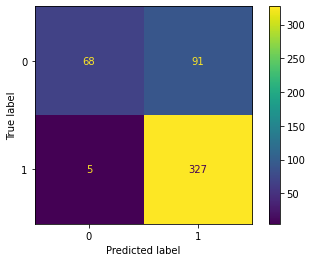

In [40]:
#Confusion Matrix

plot_confusion_matrix(model, x_train, y_train, values_format= "d")

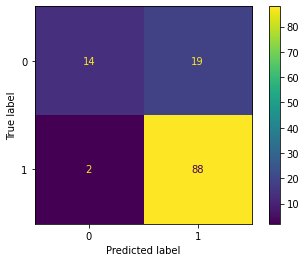

In [41]:
plot_confusion_matrix(model, x_test, y_test, values_format = "d")